<a href="https://colab.research.google.com/github/kumaranu7/Bank-Customers-Behaviour-Study-using-neural-networks/blob/master/News_classification_using_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [6]:
df = pd.read_json('/content/drive/My Drive/Colab Notebooks/Projects/News_Category_Dataset.json/News_Category_Dataset.json', lines = True)
df.head()

,short_description,headline,date,link,authors,category
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT


In [0]:
df['text'] = df['short_description'] + ' ' + df['headline']

In [8]:
df.head(2)

,short_description,headline,date,link,authors,category,text
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,She left her husband. He killed their children...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...


In [9]:
categs = df.groupby('category')
print('Total category:', categs.ngroups)

Total category: 31


In [10]:
print(categs.size())

category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
THE WORLDPOST      3664
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          2579
dtype: int64


In [0]:
df['category'] = df['category'].map(lambda x:'WORLDPOST' if x == 'THE WORLDPOST' else x)

In [12]:
cate = df.groupby('category')
print('Final categories:', cate.ngroups)
print(cate.size())

Final categories: 30
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       3858
BUSINESS           4254
COLLEGE            1144
COMEDY             3971
CRIME              2893
EDUCATION          1004
ENTERTAINMENT     14257
FIFTY              1401
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
IMPACT             2602
LATINO VOICES      1129
MEDIA              2815
PARENTS            3955
POLITICS          32739
QUEER VOICES       4995
RELIGION           2556
SCIENCE            1381
SPORTS             4167
STYLE              2254
TASTE              2096
TECH               1231
TRAVEL             2145
WEIRD NEWS         2670
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
df['words'] = X

In [14]:
df.head(2)

,short_description,headline,date,link,authors,category,text,words
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,She left her husband. He killed their children...,"[89, 424, 50, 1003, 38, 323, 44, 202, 51, 185,..."
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...,"[4, 758, 12, 31, 3, 926, 34, 1516, 2197, 20046..."


In [0]:
#delete empty and short data

In [16]:
df['word_len'] = df.words.apply(lambda i:len(i))
df = df[df.word_len >= 5]

df.head(3)

,short_description,headline,date,link,authors,category,text,words,word_len
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,She left her husband. He killed their children...,"[89, 424, 50, 1003, 38, 323, 44, 202, 51, 185,...",27
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...,"[4, 758, 12, 31, 3, 926, 34, 1516, 2197, 20046...",20
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,"[1, 670, 5, 28, 4258, 2641, 3983, 47693, 2789,...",25


In [0]:
#now use for padding

In [18]:
df.describe()

,word_len
count,124068.000000
mean,26.128422
std,14.366390
min,5.000000
25%,17.000000
50%,24.000000
75%,32.000000
max,248.000000


In [0]:
maxlen = 50
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))

In [0]:
 #handling category for words


In [20]:
df['category'].describe()

count       124068
unique          30
top       POLITICS
freq         32630
Name: category, dtype: object

In [21]:
categories = df.groupby('category').size().index.tolist()
cat_int = {}
int_cat = {}
for i, k in enumerate(categories):
  cat_int.update({k:i})
  int_cat.update({i:k})
df['c2id'] = df['category'].apply(lambda x:cat_int[x])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
df.head(3)

,short_description,headline,date,link,authors,category,text,words,word_len,c2id
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,She left her husband. He killed their children...,"[89, 424, 50, 1003, 38, 323, 44, 202, 51, 185,...",27,6
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,Of course it has a song. Will Smith Joins Dipl...,"[4, 758, 12, 31, 3, 926, 34, 1516, 2197, 20046...",20,8
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...,"[1, 670, 5, 28, 4258, 2641, 3983, 47693, 2789,...",25,8


In [0]:
#word embedding

In [24]:
word_index = tokenizer.word_index
EMBEDDING_DIM = 100
embedding_index = {}

f = open('/content/drive/My Drive/Colab Notebooks/Projects/News_Category_Dataset.json/glove.6B.100d.txt/glove.6B.100d.txt') #performing transfer learning
for line in f:
  values = line.split()
  words = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embedding_index[words] = coefs
f.close()

print('Found %s unique tokens.' %len(word_index))
print('Found %s total word vectors.' %len(embedding_index))

Found 86627 unique tokens.
Found 400000 total word vectors.


In [25]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

for word, i in  word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index) + 1, EMBEDDING_DIM, embeddings_initializer=Constant(embedding_matrix), input_length=maxlen, trainable = False)

In [0]:
X = np.array(X)
Y = np_utils.to_categorical(list(df.c2id))
seed = 29
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state = seed)

In [0]:
#textCNN


In [27]:
inp = Input(shape=(maxlen, ), dtype = 'int32')
embedding = embedding_layer(inp)
stacks = []
for kernel_size in [2,3,4]:
  conv = Conv1D(64, kernel_size, padding = 'same', activation='relu', strides= 1)(embedding)
  pool = MaxPooling1D(pool_size=3)(conv)
  drop = Dropout(0.5)(pool)
  stacks.append(drop)

merged = Concatenate()(stacks)
flatten = Flatten()(merged)
drop = Dropout(0.5)(flatten)
outp = Dense(len(int_cat), activation='softmax')(drop)

TextCNN = Model(inputs = inp, outputs = outp)
TextCNN.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

TextCNN.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      8662800     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 50, 64)       12864       embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 50, 64)       19264       embed

In [28]:
textcnn_hist = TextCNN.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_val, Y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 99254 samples, validate on 24814 samples
Epoch 1/20





99254/99254 [==============================] - 62s 627us/step - loss: 2.1712 - acc: 0.4160 - val_loss: 1.6902 - val_acc: 0.5299
Epoch 2/20
99254/99254 [==============================] - 61s 617us/step - loss: 1.8008 - acc: 0.5000 - val_loss: 1.5857 - val_acc: 0.5521
Epoch 3/20
99254/99254 [==============================] - 60s 608us/step - loss: 1.7222 - acc: 0.5180 - val_loss: 1.5421 - val_acc: 0.5624
Epoch 4/20
99254/99254 [==============================] - 61s 614us/step - loss: 1.6833 - acc: 0.5272 - val_loss: 1.5235 - val_acc: 0.5710
Epoch 5/20
99254/99254 [==============================] - 61s 618us/step - loss: 1.6561 - acc: 0.5348 - val_loss: 1.5090 - val_acc: 0.5742
Epoch 6/20
99254/99254 [==============================] - 62s 620us/step - loss: 1.6363 - acc: 0.5398 - val_loss: 1.4905 - val_acc: 0.5770
Epoch 7/20
992

In [0]:
accuracy = textcnn_hist.history['acc']
val_acc = textcnn_hist.history['val_acc']
loss = textcnn_hist.history['loss']
val_loss = textcnn_hist.history['val_loss']
epochs = range(1, len(accuracy) + 1)

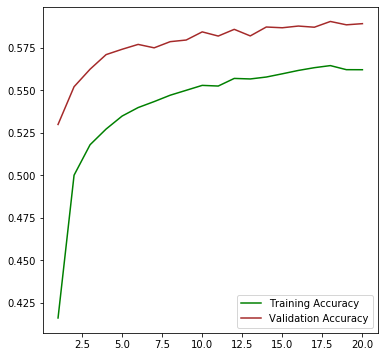

In [30]:
plt.plot(epochs, accuracy, 'green', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'brown', label = 'Validation Accuracy')
plt.legend()
plt.show()

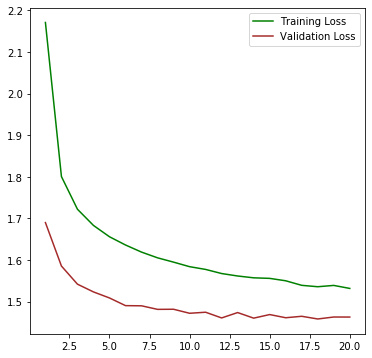

In [31]:
plt.plot(epochs, loss, 'green', label = 'Training Loss')
plt.plot(epochs, val_loss, 'brown', label = 'Validation Loss')
plt.legend()
plt.show()

In [0]:
# BidirectionalGRU + Conv

In [33]:
inp = Input((maxlen, ), dtype='int32')
x = embedding_layer(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True, dropout = 0.1, recurrent_dropout=0.1))(x)
x = Conv1D(64, kernel_size=3)(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool , max_pool])
outp = Dense(len(int_cat), activation='softmax')(x)

BiGRU = Model(inp, outp)
BiGRU.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
BiGRU.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 50)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 100)      8662800     input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 100)      0           embedding_1[1][0]                
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 50, 256)      175872      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

In [34]:
biGRU_histr = BiGRU.fit(X_train, Y_train, 128, 20, validation_data=(X_val, Y_val))

Train on 99254 samples, validate on 24814 samples
Epoch 1/20
99254/99254 [==============================] - 265s 3ms/step - loss: 1.8388 - acc: 0.4928 - val_loss: 1.4848 - val_acc: 0.5723
Epoch 2/20
99254/99254 [==============================] - 262s 3ms/step - loss: 1.5068 - acc: 0.5654 - val_loss: 1.3856 - val_acc: 0.5969
Epoch 3/20
99254/99254 [==============================] - 263s 3ms/step - loss: 1.4150 - acc: 0.5874 - val_loss: 1.3353 - val_acc: 0.6096
Epoch 4/20
99254/99254 [==============================] - 267s 3ms/step - loss: 1.3575 - acc: 0.6005 - val_loss: 1.3071 - val_acc: 0.6126
Epoch 5/20
99254/99254 [==============================] - 264s 3ms/step - loss: 1.3135 - acc: 0.6134 - val_loss: 1.2826 - val_acc: 0.6200
Epoch 6/20
99254/99254 [==============================] - 263s 3ms/step - loss: 1.2739 - acc: 0.6221 - val_loss: 1.2759 - val_acc: 0.6207
Epoch 7/20
99254/99254 [==============================] - 264s 3ms/step - loss: 1.2506 - acc: 0.6281 - val_loss: 1.2738 - 

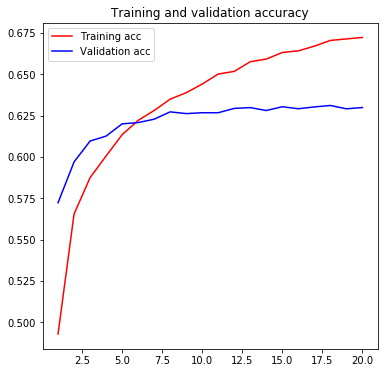

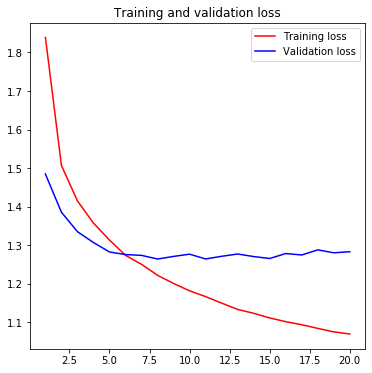

In [35]:
acc = biGRU_histr.history['acc']
val_acc = biGRU_histr.history['val_acc']
epochs = range(1, len(acc) + 1)
loss = biGRU_histr.history['loss']
val_loss = biGRU_histr.history['val_loss']

plt.title('Training and validation accuracy')  
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show() 

In [0]:
import pickle
filename = 'biGRU_histr_model.sav'
pickle.dump(biGRU_histr, open(filename, 'wb'))

In [0]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [38]:
lstm_layer = LSTM(300, dropout = 0.25, recurrent_dropout=0.25, return_sequences=True)

inp = Input(shape=(maxlen, ), dtype='int32')
embedding = embedding_layer(inp)
x = lstm_layer(embedding)
x = Dropout(0.25)(x)
merged = Attention(maxlen)(x) #attention is being applied on x with maxlen passed in it
merged = Dense(256, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
outp = Dense(len(int_cat), activation = 'softmax')(merged)

AttentionLSTM = Model(inputs = inp, outputs = outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
AttentionLSTM.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 50)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 50, 100)           8662800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 300)           481200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 300)           0         
_________________________________________________________________
attention_1 (Attention)      (None, 300)               350       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               77056     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024

In [0]:
AttentionLSTM_histr = AttentionLSTM.fit(X_train, Y_train, batch_size = 128, epochs = 20, validation_data=(X_val, Y_val))

In [0]:
acc = AttentionLSTM_histr.history['acc']
val_acc = AttentionLSTM_histr.history['val_acc']
loss = AttentionLSTM_histr.history['loss']
val_loss = AttentionLSTM_histr.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

In [0]:
predicted = AttentionLSTM.predict(X_val)
cm = pd.DataFrame(confusion_matrix(Y_val.argmax(axis = 1), predicted.argmax(axis = 1)))
from IPython.display import display
pd.options.display.max_columns = None
display(cm)

In [0]:
#evaluate accuracy

In [0]:
def evaluate_accuracy(model):
  predicted = model.predict(X_val)
  diff = Y_val.argmax(axis = -1) - predicted.argmax(axis = -1)  
  corrects = np.where(diff == 0)[0].shape[0]
  total = Y_val.shape[0]
  return (corrects/total)

In [0]:
print('Model TextCNN accuracy: %.6f' %evaluate_accuracy(TextCNN))
print('Model BiGRU + Conv1D accuracy: %.6f' %evaluate_accuracy(BiGRU))
print('Model Attention accuracy: %.6f' %evaluate_accuracy(AttentionLSTM))


In [0]:
#Ensembling models

In [0]:
def ensemble_acc(models):
  res = np.zeros(shape = Y_val.shape)
  for model in models:
    predicted = model.predict(X_val)
    res += predicted
  res/= len(models)
  diff = Y_val.argmax(axis = -1) - res.argmax(axis = -1) 
  correct = np.where(diff == 0)[0].shape[0]
  total = Y_val.shape[0]
  return float(correct/total)


print('Overall accuracy: %.6f' %ensemble_acc([TextCNN, BiGRU, AttentionLSTM]))